# ML Zoomcamp 2023 - Homework #8

Name: Wong Chee Fah

Email: wongcheefah@gmail.com

### Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. 
For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt. 

Download the dataset for this homework from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip):

```bash
wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
unzip data.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 


### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [1]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import Input

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.losses import BinaryCrossentropy

2023-11-23 13:36:23.944214: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 13:36:24.079924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 13:36:24.080002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 13:36:24.084558: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 13:36:24.110901: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 13:36:24.112783: I tensorflow/core/platform/cpu_feature_guard.cc:1

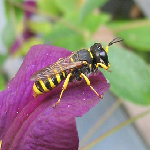

In [2]:
path = './data/test/wasp'
name = '17624919_f1b40b889f_n.jpg'
img = load_img(f'{path}/{name}', target_size=(150, 150))
img

In [3]:
x = np.array(img)
x.shape

(150, 150, 3)

In [4]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3677 images belonging to 2 classes.


In [5]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [6]:
test_ds = gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 918 images belonging to 2 classes.


In [7]:
test_ds.class_indices

{'bee': 0, 'wasp': 1}

In [8]:
model = Sequential()

model.add(Input(shape=x.shape))
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150, 150, 3)
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
learning_rate = 0.002
momentum=0.8

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
loss = BinaryCrossentropy(from_logits=False)
metrics=['accuracy']

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

##### Ans: `binary crossentropy`

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

##### Ans: `896`

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [11]:
rescaler = ImageDataGenerator(rescale=1./255)

train_ds = rescaler.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [12]:
test_ds = rescaler.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 918 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


184/184 [==============================] - 67s 350ms/step - loss: 0.6640 - accuracy: 0.5999 - val_loss: 0.6575 - val_accuracy: 0.5468
Epoch 2/10
184/184 [==============================] - 59s 322ms/step - loss: 0.6004 - accuracy: 0.6785 - val_loss: 0.5579 - val_accuracy: 0.7190
Epoch 3/10
184/184 [==============================] - 62s 334ms/step - loss: 0.5490 - accuracy: 0.7253 - val_loss: 0.5534 - val_accuracy: 0.7102
Epoch 4/10
184/184 [==============================] - 53s 287ms/step - loss: 0.5208 - accuracy: 0.7552 - val_loss: 0.5259 - val_accuracy: 0.7386
Epoch 5/10
184/184 [==============================] - 48s 263ms/step - loss: 0.4981 - accuracy: 0.7675 - val_loss: 0.5158 - val_accuracy: 0.7603
Epoch 6/10
184/184 [==============================] - 52s 283ms/step - loss: 0.4715 - accuracy: 0.7824 - val_loss: 0.4989 - val_accuracy: 0.7712
Epoch 7/10
184/184 [==============================] - 49s 265ms/step - loss: 0.4514 - accuracy: 0.7947 - val_loss: 0.5144 - val_accuracy: 0.7

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

In [14]:
np.median(history.history['accuracy'])

0.7749523818492889

##### Ans: `0.80`

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

In [15]:
np.std(history.history['loss'])

0.08492397400720747

##### Ans: `0.091`

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to the training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`


In [16]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [17]:
aug_history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 79s 428ms/step - loss: 0.5021 - accuracy: 0.7669 - val_loss: 0.5066 - val_accuracy: 0.7614
Epoch 2/10
184/184 [==============================] - 65s 355ms/step - loss: 0.4815 - accuracy: 0.7781 - val_loss: 0.4680 - val_accuracy: 0.7789
Epoch 3/10
184/184 [==============================] - 63s 341ms/step - loss: 0.4756 - accuracy: 0.7797 - val_loss: 0.4611 - val_accuracy: 0.7930
Epoch 4/10
184/184 [==============================] - 65s 355ms/step - loss: 0.4763 - accuracy: 0.7824 - val_loss: 0.4643 - val_accuracy: 0.7930
Epoch 5/10
184/184 [==============================] - 63s 341ms/step - loss: 0.4711 - accuracy: 0.7707 - val_loss: 0.4777 - val_accuracy: 0.7778
Epoch 6/10
184/184 [==============================] - 64s 348ms/step - loss: 0.4720 - accuracy: 0.7849 - val_loss: 0.4637 - val_accuracy: 0.7865
Epoch 7/10
184/184 [==============================] - 61s 333ms/step - loss: 0.4675 - accuracy: 0.7827 - val_loss: 0.4966 - val_ac

### Question 5

Train our model for 10 more epochs using the same code as previously.
> **Note:** make sure to not re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

In [20]:
np.mean(aug_history.history['val_loss'])

0.47413656711578367

##### Ans: `0.48`

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

In [25]:
np.mean(aug_history.history['val_accuracy'][5:])

0.7827886581420899

##### Ans: `0.78`